# There was a problem with different levels in

In [25]:
from loguru import logger
import unittest
import os.path as op
from pathlib import Path
from nose.plugins.attrib import attr

path_to_script =  Path("~/projects/scaffan/").expanduser()

print(path_to_script.exists())
#pwd() # op.dirname(op.abspath(__file__))

import sys

# sys.path.insert(0, op.abspath(op.join(path_to_script, "../../io3d")))
# sys.path.insert(0, op.abspath(op.join(path_to_script, "../../imma")))
sys.path.insert(0,str(path_to_script))
# import sys
# import os.path

# imcut_path =  os.path.join(path_to_script, "../../imcut/")
# sys.path.insert(0, imcut_path)

import glob
import os
import numpy as np
import matplotlib.pyplot as plt

skip_on_local = False

import scaffan.image as scim
scim.import_openslide()
import openslide

import io3d
import scaffan
import scaffan.image as scim

True


2019-07-08 19:41:59.870 | DEBUG    | scaffan.image:__init__:164 - Reading file C:\Users\Jirik/data/medical\orig\CMU-1.ndpi
2019-07-08 19:41:59.981 | DEBUG    | scaffan.image:__init__:178 - Reading the annotation
2019-07-08 19:42:01.190 | DEBUG    | scaffan.annotation:read_annotations:111 - windows annotation output:b'C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\mingw-w64\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\usr\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\scaffan\\Library\\bin;C:\\Users\\Jirik\\Miniconda3\\envs\\sc

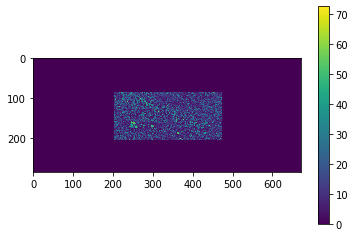

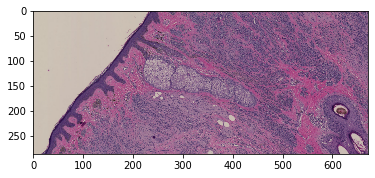

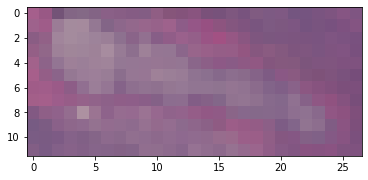

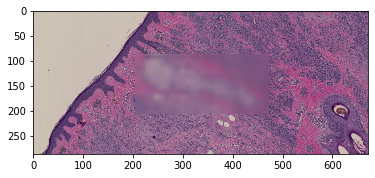

In [26]:
fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)
annotation_ids = anim.select_annotations_by_title("obj1")
view1 = anim.get_views(annotation_ids, margin=1.0, pixelsize_mm=[0.005, 0.005])[0]
image1 = view1.get_region_image()
# plt.imshow(image1)
# plt.colorbar()
# plt.show()

view2 = anim.get_views(annotation_ids, margin=0.1, pixelsize_mm=[0.05, 0.05])[0]
image2 = view2.get_region_image()
# plt.imshow(image2)
# plt.show()
logger.debug(f"Annotation ID: {annotation_ids}, location view1 {view1.region_location}, view2 {view2.region_location}")

merged = view1.insert_image_from_view(view2, image1, image2)
# plt.imshow(merged)
# plt.show()
diffim = image1[:, :, :3].astype(np.int16) - merged[:, :, :3].astype(np.int16)
errimg = np.mean(np.abs(diffim), 2)
def logim(image1, text):
    if len(image1.shape) == 3 and image1.shape[2] == 4:
        logger.debug(f"{text} dtype: {image1.dtype}, shape: {image1.shape}, min max: [{np.min(image1[:,:,:3])}, {np.max(image1[:,:,:3])}], mean: {np.mean(image1[:,:,:3])}, min max alpha: [{np.min(image1[:,:,3])}, {np.max(image1[:,:,3])}], mean: {np.mean(image1[:,:,3])}")
    else:
        logger.debug(f"{text} dtype: {image1.dtype}, shape: {image1.shape}, min max: [{np.min(image1[:,:])}, {np.max(image1[:,:])}], mean: {np.mean(image1[:,:])}")

# logim(image1_copy, "image1_copy")
logim(image1, "image1")
logim(image2, "image2")
logim(merged, "merged")
logim(diffim, "diffim")
logim(errimg, "errimg")

# logger.debug(f"image2 dtype: {image2.dtype}, shape: {image2.shape}, min max: [{np.min(image2[:,:,:3])}, {np.max(image2[:,:,:3])}], mean: {np.mean(image2[:,:,:3])}, min max alpha: [{np.min(image2[:,:,3])}, {np.max(image2[:,:,3])}], mean: {np.mean(image2[:,:,3])}")
# logger.debug(f"merged dtype: {merged.dtype}, shape: {merged.shape}, min max: [{np.min(merged[:,:,:3])}, {np.max(merged[:,:,:3])}], mean: {np.mean(merged[:,:,:3])}, min max alpha: [{np.min(merged[:,:,3])}, {np.max(merged[:,:,3])}], mean: {np.mean(merged[:,:,3])}")
# logger.debug(f"errimg dtype: {errimg.dtype}, shape: {errimg.shape}, min max: [{np.min(errimg)}, {np.max(errim)}], mean: {np.mean(errim)}")
plt.figure()
plt.imshow(errimg)
plt.colorbar()
plt.savefig("errimg.png")

plt.figure()
plt.imshow(image1)
plt.savefig("image1.png")

plt.figure()
plt.imshow(image2)
plt.savefig("image2.png")

plt.figure()
plt.imshow(merged)
plt.savefig("merged.png")

err = np.mean(errimg)
# self.assertLess(err, 3, "Mean error in intensity levels per pixel should be low")
# self.assertLess(1, err, "Mean error in intensity levels per pixel should be low but there should be some error.")

In [27]:
view1.anim.openslide.dimensions

(51200, 38144)

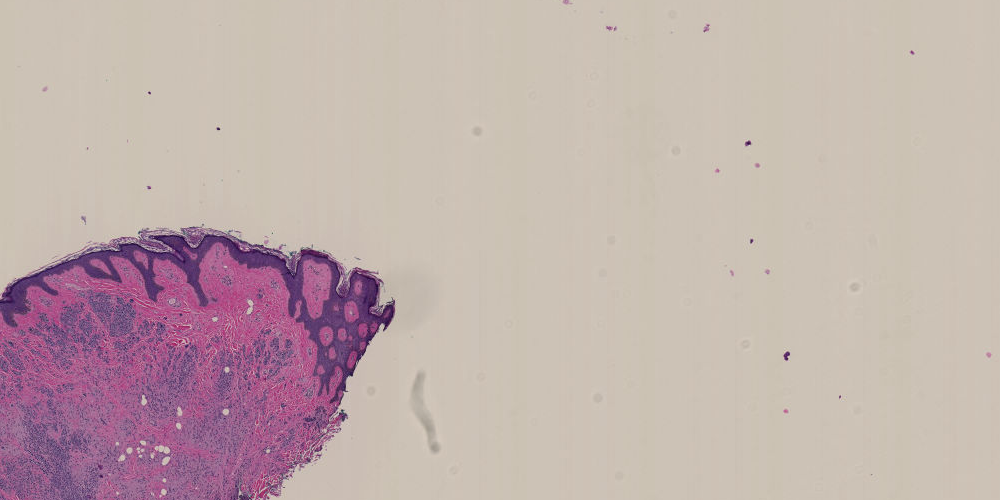

In [28]:
view1.anim.openslide.read_region(location=(10000,12000), level=4, size=(1000,500))

In [29]:
anim.get_annotations_bounds_px(12)

(array([ 7439.2687785 , 20612.41783375]), array([2452.178155 , 1048.4953725]))

In [30]:
display(view1.region_level)
display(view1.region_location)
display(view1.region_center)
display(view1.region_size_on_level)
display(view1.region_size_on_pixelsize_mm)
display(view1.region_pixelunit)
display(view1.region_pixelsize)

2

array([ 3763, 19040])

array([ 7439.2687785 , 20612.41783375])

array([1839,  786])

array([672, 287])

'mm'

array([0.005, 0.005])

2019-07-08 19:42:06.005 | DEBUG    | scaffan.image:get_region_image:709 - imcr dtype: uint8, shape: (786, 1839, 4), min max: [0, 246], mean: 133.58211768297943, min max alpha: [254, 255], mean: 254.99782490483958


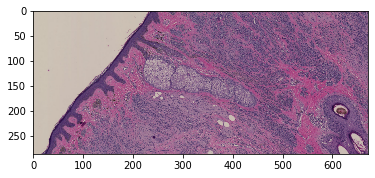

In [31]:
image1 = view1.get_region_image()
plt.imshow(image1)

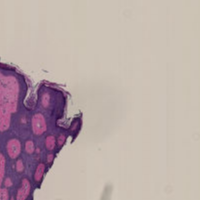

In [32]:
im1 = view1.anim.openslide.read_region(location=(15000,15000), level=4, size=(200,200))
im1

PIL.Image.Image

dtype('uint8')

(200, 200, 4)

(8, 255)

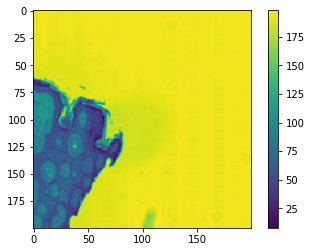

In [33]:
display(type(im1))
npim = np.asarray(im1)
display(npim.dtype)
plt.imshow(npim[:,:,1])
plt.colorbar()
display(npim.shape)
np.min(npim), np.max(npim)


In [34]:
import PIL
PIL.__version__

'5.4.1'

# Not Solution

There was different version of PIL on each platform. We will stay on pillow (or shortly PIL) version 6 (old was 5.4.1). 

After test we can go to 6

(array([ 3763, 19040]), 2, array([1839,  786]))

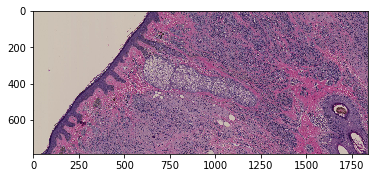

In [36]:
display((view1.region_location, view1.region_level, view1.region_size_on_level))
imcr = view1.anim.openslide.read_region(
    view1.region_location, level=view1.region_level, size=view1.region_size_on_level
)
im = np.asarray(imcr)
plt.imshow(im)

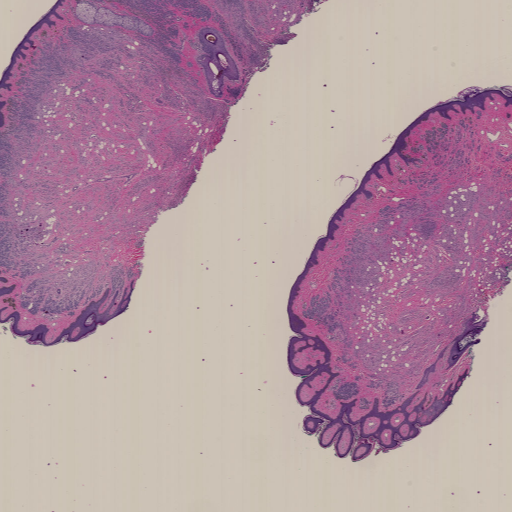

In [42]:
imcr = view1.anim.openslide.read_region(
    [3763, 20000], level=5, size=[512, 512]
#     size=view1.region_size_on_level
)
imcr